In [326]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [337]:
data = pd.read_csv('NED_DATA.csv', skiprows=12)#,dtype=float,skiprows=12)
data.head(8) #showing first 8 values bc that is where the first NaN appears in 'Hubble const.'

,FRN,Exclusion Code,D,G,Galaxy ID,m-M,err,D (Mpc),Method,REFCODE,Unnamed: 10,Unnamed: 11,Hubble const.,Adopted LMC modulus,Date (Yr. - 1980)
0,NaN,1,1,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,NaN,34.0,SDSS CAND. AGN; MLCS2K2
1,NaN,2,1,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,NaN,34.0,SDSS CAND. AGN; SALT 2
2,NaN,999999,1,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,NaN,34.0,"SDSS-II SN 13651, SDSS CAND. AGN; MLCS2K2"
3,NaN,999999,1,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,NaN,34.0,"SDSS-II SN 13651, SDSS CAND. AGN; SALT 2"
4,NaN,3,2,2MASX J00000138+1530350,38.86,0.46,592.0,FP,2016A&A...596A..14S,NaN,NaN,70.0,NaN,36.0,NaN
5,NaN,4,3,2MASX J00000155-0929403,39.79,0.46,910.0,FP,2016A&A...596A..14S,NaN,NaN,70.0,NaN,36.0,NaN
6,NaN,5,4,UGC 12889,33.65,0.66,53.7,Tully-Fisher,1984A&AS...56..381B,NaN,NaN,103.0,NaN,4.0,Diameter
7,NaN,6,4,UGC 12889,34.16,0.40,68.0,Tully-Fisher,2007A&A...465...71T,NaN,NaN,NaN,NaN,27.0,mean


In [338]:
#Need to fix the errors in column headers

data.columns = data.columns[1:].tolist()+['Notes']
data.head(8)

,Exclusion Code,D,G,Galaxy ID,m-M,err,D (Mpc),Method,REFCODE,Unnamed: 10,Unnamed: 11,Hubble const.,Adopted LMC modulus,Date (Yr. - 1980),Notes
0,NaN,1,1,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,NaN,34.0,SDSS CAND. AGN; MLCS2K2
1,NaN,2,1,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,NaN,34.0,SDSS CAND. AGN; SALT 2
2,NaN,999999,1,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,NaN,34.0,"SDSS-II SN 13651, SDSS CAND. AGN; MLCS2K2"
3,NaN,999999,1,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,NaN,34.0,"SDSS-II SN 13651, SDSS CAND. AGN; SALT 2"
4,NaN,3,2,2MASX J00000138+1530350,38.86,0.46,592.0,FP,2016A&A...596A..14S,NaN,NaN,70.0,NaN,36.0,NaN
5,NaN,4,3,2MASX J00000155-0929403,39.79,0.46,910.0,FP,2016A&A...596A..14S,NaN,NaN,70.0,NaN,36.0,NaN
6,NaN,5,4,UGC 12889,33.65,0.66,53.7,Tully-Fisher,1984A&AS...56..381B,NaN,NaN,103.0,NaN,4.0,Diameter
7,NaN,6,4,UGC 12889,34.16,0.40,68.0,Tully-Fisher,2007A&A...465...71T,NaN,NaN,NaN,NaN,27.0,mean


In [339]:
data.rename(columns={'Unnamed: 11': 'redshift (z)', 'Unnamed: 10': 'SNID'}, inplace=True)
data.head(8)
#Now we fixed the dataframe

,Exclusion Code,D,G,Galaxy ID,m-M,err,D (Mpc),Method,REFCODE,SNID,redshift (z),Hubble const.,Adopted LMC modulus,Date (Yr. - 1980),Notes
0,NaN,1,1,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,NaN,34.0,SDSS CAND. AGN; MLCS2K2
1,NaN,2,1,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,NaN,34.0,SDSS CAND. AGN; SALT 2
2,NaN,999999,1,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,NaN,34.0,"SDSS-II SN 13651, SDSS CAND. AGN; MLCS2K2"
3,NaN,999999,1,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,NaN,34.0,"SDSS-II SN 13651, SDSS CAND. AGN; SALT 2"
4,NaN,3,2,2MASX J00000138+1530350,38.86,0.46,592.0,FP,2016A&A...596A..14S,NaN,NaN,70.0,NaN,36.0,NaN
5,NaN,4,3,2MASX J00000155-0929403,39.79,0.46,910.0,FP,2016A&A...596A..14S,NaN,NaN,70.0,NaN,36.0,NaN
6,NaN,5,4,UGC 12889,33.65,0.66,53.7,Tully-Fisher,1984A&AS...56..381B,NaN,NaN,103.0,NaN,4.0,Diameter
7,NaN,6,4,UGC 12889,34.16,0.40,68.0,Tully-Fisher,2007A&A...465...71T,NaN,NaN,NaN,NaN,27.0,mean


In [340]:
#I'm first going to drop columns that do not help such as Exclusion code, REFCODE, SNID, Adopted LMC modulus and Notes
'''reason for dropping each
Exclusion code - Tells us if the data is from sources incorporated with NED which is not going to tell us about the measurement
D - We want our decision tree to be based on methods and results not the actual objects
G - Same as D they both use a number to describe the object
REFCODE - Tells what paper the measurement is from
SN_ID - Only relevant for supernova measurements which is not all of our datapoints
Adopted LMC modulus - Similar to SNID only relevant to certain measurements
Notes - Extra infor about measurement not present in most
'''
data = data.drop(['Exclusion Code','D','G','REFCODE','SNID','Adopted LMC modulus','Notes'], axis=1)
#We are looking at whether or not there is a hubble const measurement so we don't want to remove those
data['Hubble const.'] = data['Hubble const.'].fillna(0.0)
data.head(8)

,Galaxy ID,m-M,err,D (Mpc),Method,redshift (z),Hubble const.,Date (Yr. - 1980)
0,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,0.249917,70.0,34.0
1,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,0.249917,70.0,34.0
2,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,0.249917,70.0,34.0
3,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,0.249917,70.0,34.0
4,2MASX J00000138+1530350,38.86,0.46,592.0,FP,NaN,70.0,36.0
5,2MASX J00000155-0929403,39.79,0.46,910.0,FP,NaN,70.0,36.0
6,UGC 12889,33.65,0.66,53.7,Tully-Fisher,NaN,103.0,4.0
7,UGC 12889,34.16,0.40,68.0,Tully-Fisher,NaN,0.0,27.0


In [341]:
data = data.dropna()
hubble = data['Hubble const.']
print(data.shape)
print(hubble.shape)
data.head(8)

(30116, 8)
(30116,)


,Galaxy ID,m-M,err,D (Mpc),Method,redshift (z),Hubble const.,Date (Yr. - 1980)
0,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,0.249917,70.0,34.0
1,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,0.249917,70.0,34.0
2,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,0.249917,70.0,34.0
3,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,0.249917,70.0,34.0
16,SDSS-II SN 14480,41.20,0.33,1300.0,SNIa,0.330796,70.0,34.0
17,SDSS-II SN 14480,41.30,0.32,1370.0,SNIa,0.330796,70.0,34.0
21,SDSS-II SN 14480,41.20,0.33,1300.0,SNIa,0.330796,70.0,34.0
22,SDSS-II SN 14480,41.30,0.32,1370.0,SNIa,0.330796,70.0,34.0


In [342]:
print(hubble.unique())
#there is an odd value coming out here that is 69.7 100. maybe its just printing weirdly
for x in hubble.unique():
    print(x)
#yes just printing weirdly on my screen

[ 70.   74.2   0.   72.   73.8  65.   60.   73.   74.   69.7 100.   71.
  70.8  71.6]
70.0
74.2
0.0
72.0
73.8
65.0
60.0
73.0
74.0
69.7
100.0
71.0
70.8
71.6


In [343]:
#I want to have a column that is either 1 or 0 for 'has hubble measurement or doesnt. So i realize I didn't really need to pull out this 'hubble' variable
hubble2 = np.copy(hubble) #It was modifying the Hubble const column in the df
hubble2[hubble2 != 0.0] = 1.0
#Then stick it back in the df
data['Has Hubble'] = hubble2
data.head(8)

,Galaxy ID,m-M,err,D (Mpc),Method,redshift (z),Hubble const.,Date (Yr. - 1980),Has Hubble
0,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,0.249917,70.0,34.0,1.0
1,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,0.249917,70.0,34.0,1.0
2,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,0.249917,70.0,34.0,1.0
3,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,0.249917,70.0,34.0,1.0
16,SDSS-II SN 14480,41.20,0.33,1300.0,SNIa,0.330796,70.0,34.0,1.0
17,SDSS-II SN 14480,41.30,0.32,1370.0,SNIa,0.330796,70.0,34.0,1.0
21,SDSS-II SN 14480,41.20,0.33,1300.0,SNIa,0.330796,70.0,34.0,1.0
22,SDSS-II SN 14480,41.30,0.32,1370.0,SNIa,0.330796,70.0,34.0,1.0


This concludes cleaning the data

In [ ]:
#Attempt at using ChatGPT to build the tree
#It suggests dropping the columns GalaxyID and Hubble const. both of which I had considered dropping
#Galaxy ID makes sense to drop because it can simply be used as an identifier for the measurement
#Hubble const. makes sense to drop because it is what we are trying to predict
data = data.drop(columns=["Galaxy ID", "Hubble const."])
#It also wants to encode the method column which is fine because there are not a crazy amount of differnt methods
print(data['Method'].unique())
data["Method"] = data["Method"].astype("category").cat.codes
#Lastly split into Target and feature
X = data.drop(columns=["Has Hubble"]).values
y = data["Has Hubble"].values
print(X.shape, y.shape) #just checking and it looks alright
print(X[0])


['SNIa SDSS' 'SNIa' 'SNII optical' 'BCG' 'GRB' 'HII LF' 'D-Sigma'
 'Faber-Jackson' 'G Lens']
(30116, 6) (30116,)
[4.16400e+01 1.70000e-01 1.70000e+03 8.00000e+00 2.49917e-01 3.40000e+01]


In [301]:
#Create a function for gini impurity
def gini(y):
    """Calculate Gini impurity for a list of labels.
    input:
        y: targets, list
    output:
        value of the gini impurity for the input target
    """
    classes, counts = np.unique(y, return_counts=True) #Gives all the unique values as well as the counts of them (how many times they appear)
    prob_sq = (counts / counts.sum()) ** 2 #probability (events/total) of each unique value^2
    return 1 - prob_sq.sum() #computes 1-sum of the prob sq

In [302]:
def best_split(X, y):
    """Find the best feature and threshold to split on. (This will be a greedy tree)
    input:
        X: features, lists containing all the features and their datapoints
        y: target, list of the target (1/0)
    output:
        best_feature: the best feature to split on (int used as an index)
        best_threshold: the threshold to split the feature on (float)
    """
    #set baseline for gini and initialize feature/threshold
    best_gini = 1
    best_feature = None
    best_threshold = None

    n_samples, n_features = X.shape # create sample and feature sizes

    for feature in range(n_features):
        thresholds = np.unique(X[:, feature]) #finds all unique thresholds we could have for each feature (seems like a lot of computation)

        for threshold in thresholds: #on each threshold previously defined
            left_mask = X[:, feature] <= threshold #Splits the feature on one threshold at a time
            right_mask = ~left_mask #other side of the threshold is opposite of first side (left and right are a bit confusing to use in description)

            if left_mask.sum() == 0 or right_mask.sum() == 0: #if either side of the split is empty we skip this threshold
                continue
#            print(left_mask)
            left_gini = gini(y[left_mask]) #compute gini impurity on the left and right
            right_gini = gini(y[right_mask])
            weighted_gini = (left_mask.sum() * left_gini + right_mask.sum() * right_gini) / n_samples #Calculate a weighted gini adds weighted left and right
            #For left you do left_gini * total on left/total samples (total on the left works because )

            if weighted_gini < best_gini: #We want to choose the threshold with the lowest gini impurity (best sorted)
                #If we have a lower impurity at this threshold then we reinitialize our 'best'
                best_gini = weighted_gini
                best_feature = feature
                best_threshold = threshold

    return best_feature, best_threshold

In [303]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        #Class that stores all the info on the node
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value  # Leaf node value

def build_tree(X, y, depth=0, max_depth=5):
    '''
    Function that creates the tree
    input:
        X: features, lists containing all the features and their datapoints
        y: target, list of the target (1/0)
        depth: what part of the tree are we looking at (int)
        max_depth: what is the maximum depth we allow the tree to be (int)
    '''
    if len(set(y)) == 1 or depth >= max_depth: #Important argument If we reached the max depth or our leaf only has 1 y value we continue.
        leaf_value = np.bincount(y.astype(int)).argmax() #defines the most common value on this leaf
        return Node(value=leaf_value) #returns the node values

    feature, threshold = best_split(X, y) #calculates the best possible split if the tree hasn't 'ended'
    if feature is None: #This is kind of silly to have because likely the last if statement would have caught the end of the tree but still useful backup
        leaf_value = np.bincount(y.astype(int)).argmax() 
        return Node(value=leaf_value)

    left_mask = X[:, feature] <= threshold #Just like before we split on the threshold into left and right
    right_mask = ~left_mask

    #Creates the recursive part of the function that builds more 'branches' and 'leaves' on our tree
    left = build_tree(X[left_mask], y[left_mask], depth + 1, max_depth) #Now we continue building the tree from the left and right 
    right = build_tree(X[right_mask], y[right_mask], depth + 1, max_depth)

    return Node(feature=feature, threshold=threshold, left=left, right=right)

In [304]:
def predict_tree(node, sample):
    '''
    This function pretty much just spits out what the value is at each leaf
    input:
        node: information about the tree such as thresholds and features to split on from the build tree function
        sample: a feature which is used to make the predcition using the splits from the tree
    output:
        node.value: the value of that node, either 1 or 0 for has or doesn't have hubble value
    '''
    while node.value is None: #pretty much saying before we have any nodes we will make some
        if sample[node.feature] <= node.threshold: #check if the feature (sample) is on the left or right of this threshold 
            node = node.left
        else:
            node = node.right
    return node.value

In [265]:
tree = build_tree(X, y, max_depth=5) #Build the tree
predictions = [predict_tree(tree, sample) for sample in X] #Use the tree to show the predictions 

In [266]:
#I want to look at the difference now for different tree depths maybe 1-10 and look at how it changes
#to evaluate how it changes I will look at the accuracy of a train/test split 

In [267]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def predict(node, X):
    '''
    this function is used to make a prediction on a tree from a testing dataset
    '''
    return np.array([predict_tree(node, sample) for sample in X])

In [268]:
'''
WARNING TAKES ~2min TO RUN
'''
# List to store results
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1s = []

for depth in range(1, 11):
    # Train the decision tree
    tree = build_tree(X_train, y_train, max_depth=depth)
    
    # Predict on the test set
    y_pred_test = predict(tree, X_test)
    
    # Calculate metrics
    accuracy = np.mean(y_pred_test == y_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    
    # Store the results
    test_accuracies.append(accuracy)
    test_precisions.append(precision)
    test_recalls.append(recall)
    test_f1s.append(f1)

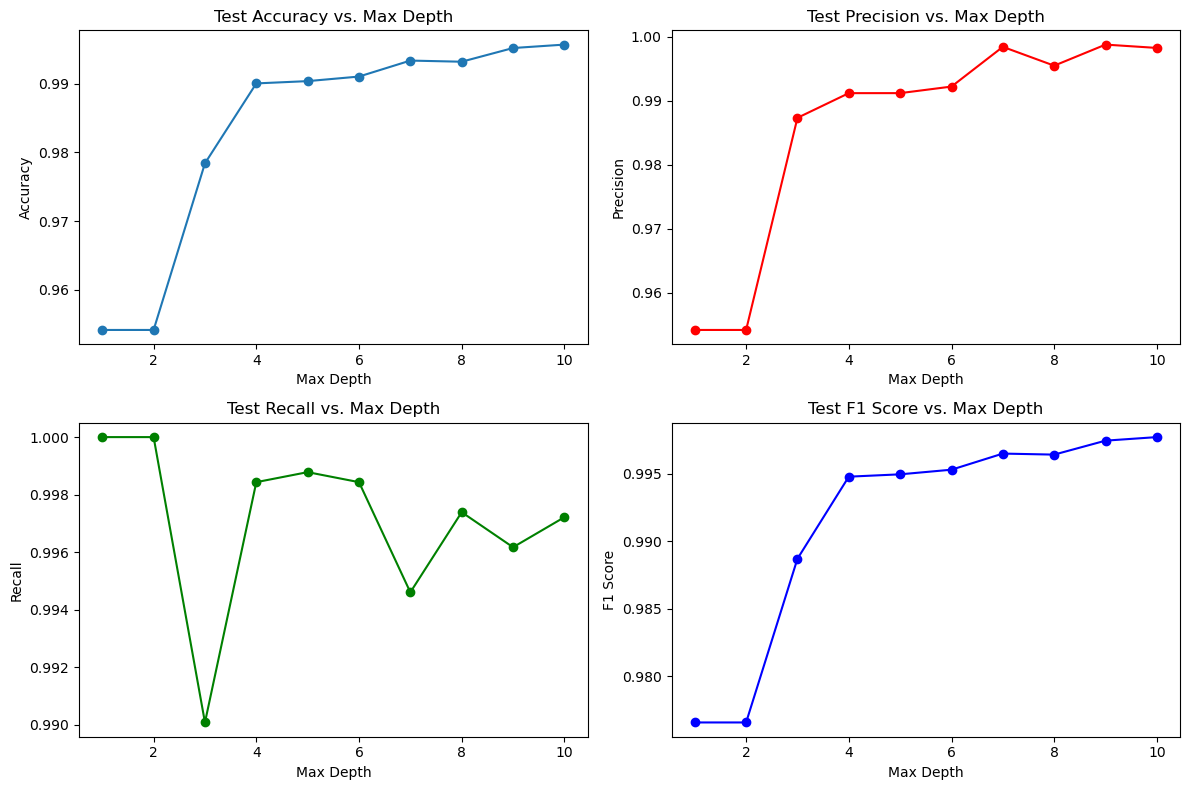

In [269]:
plt.figure(figsize=(12, 8))

# Accuracy plot
plt.subplot(2, 2, 1)
plt.plot(range(1, 11), test_accuracies, marker='o')
plt.title('Test Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

# Precision plot
plt.subplot(2, 2, 2)
plt.plot(range(1, 11), test_precisions, marker='o', color='r')
plt.title('Test Precision vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Precision')

# Recall plot
plt.subplot(2, 2, 3)
plt.plot(range(1, 11), test_recalls, marker='o', color='g')
plt.title('Test Recall vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Recall')

# F1 plot
plt.subplot(2, 2, 4)
plt.plot(range(1, 11), test_f1s, marker='o', color='b')
plt.title('Test F1 Score vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()

Really odd how the recall tanks at a depth of 3, 7, and 9

In [270]:
# Confusion Matrix for the best depth
best_depth = np.argmax(test_f1s) + 1  # depth with highest F1 score
best_tree = build_tree(X_train, y_train, max_depth=best_depth)
y_pred_best = predict(best_tree, X_test)

conf_matrix = confusion_matrix(y_test, y_pred_best)

In [271]:
print('Best depth:', best_depth) #well of course it is 10 
print(conf_matrix)

Best depth: 10
[[ 266   10]
 [  16 5732]]


In [287]:
#I came back up to this after doing testing below trying to understand the splits. Now I am getting help to write this function to print all the splits
def print_tree(node, depth=0):
    indent = "  " * depth
    if node.value is not None:
        print(f"{indent}Leaf node: Predict {node.value}")
    else:
        print(f"{indent}Depth {depth}: Split on feature {node.feature} at threshold {node.threshold}")
        print_tree(node.left, depth + 1)
        print_tree(node.right, depth + 1)

In [ ]:
tree = build_tree(X, y, max_depth=5)
print_tree(tree) #This function is really impressive. I like the use of spaces to indent really helps with visualization.

Depth 0: Split on feature 5 at threshold 30.0
  Depth 1: Split on feature 5 at threshold 29.0
    Depth 2: Split on feature 3 at threshold 6.0
      Depth 3: Split on feature 3 at threshold 5.0
        Depth 4: Split on feature 4 at threshold 1.30658
          Leaf node: Predict 1
          Leaf node: Predict 1
        Leaf node: Predict 0
      Depth 3: Split on feature 4 at threshold 0.00638
        Depth 4: Split on feature 4 at threshold 0.005791
          Leaf node: Predict 1
          Leaf node: Predict 1
        Depth 4: Split on feature 5 at threshold 28.0
          Leaf node: Predict 1
          Leaf node: Predict 1
    Depth 2: Split on feature 2 at threshold 1480.0
      Depth 3: Split on feature 3 at threshold 6.0
        Depth 4: Split on feature 3 at threshold 4.0
          Leaf node: Predict 1
          Leaf node: Predict 0
        Depth 4: Split on feature 0 at threshold 39.31
          Leaf node: Predict 1
          Leaf node: Predict 1
      Depth 3: Split on feature 

Even just one split seems extremely effective so I'm going to look at what this split is.

In [272]:
# Get the first split from the tree
first_split = tree  # This is the root node of the tree
first_feature = first_split.feature
first_threshold = first_split.threshold
print(first_feature, first_threshold)
print(data.columns[first_feature])

5 30.0
Date (Yr. - 1980)


This makes a lot of sense. It seems after 2010 (30 yrs after 1980) It perhaps became standard to release this measurement with your data. It is entirely possible that the question being asked wasn't really necessary. I'm going to perform the analysis once more but omit the date column to see how the results change.

In [345]:
print(X[0])
X_new = np.delete(X, 5, axis=1)
print(X_new[0])
index = np.where(data.drop(columns=["Date (Yr. - 1980)"])['Has Hubble'] != 1)
print((data.drop(columns=["Date (Yr. - 1980)"])['Has Hubble'].unique()))

[4.16400e+01 1.70000e-01 1.70000e+03 8.00000e+00 2.49917e-01 3.40000e+01]
[4.16400e+01 1.70000e-01 1.70000e+03 8.00000e+00 2.49917e-01]
[1. 0.]


In [347]:
tree = build_tree(X_new, y, max_depth=5)
print_tree(tree)

Depth 0: Split on feature 4 at threshold 0.508995
  Depth 1: Split on feature 3 at threshold 6.0
    Depth 2: Split on feature 0 at threshold 33.18
      Leaf node: Predict 0
      Depth 3: Split on feature 3 at threshold 4.0
        Depth 4: Split on feature 4 at threshold 0.451
          Leaf node: Predict 1
          Leaf node: Predict 0
        Depth 4: Split on feature 1 at threshold 0.08
          Leaf node: Predict 1
          Leaf node: Predict 1
    Depth 2: Split on feature 4 at threshold 0.336879
      Depth 3: Split on feature 4 at threshold 0.18195
        Depth 4: Split on feature 4 at threshold 0.00638
          Leaf node: Predict 1
          Leaf node: Predict 1
        Depth 4: Split on feature 4 at threshold 0.182
          Leaf node: Predict 0
          Leaf node: Predict 1
      Depth 3: Split on feature 1 at threshold 0.17
        Depth 4: Split on feature 1 at threshold 0.14
          Leaf node: Predict 1
          Leaf node: Predict 1
        Leaf node: Predict 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
'''
WARNING TAKES ~1min TO RUN
'''
# List to store results
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1s = []

for depth in range(1, 11):
    # Train the decision tree
    tree = build_tree(X_train, y_train, max_depth=depth)
    
    # Predict on the test set
    y_pred_test = predict(tree, X_test)
    
    # Calculate metrics
    accuracy = np.mean(y_pred_test == y_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    
    # Store the results
    test_accuracies.append(accuracy)
    test_precisions.append(precision)
    test_recalls.append(recall)
    test_f1s.append(f1)

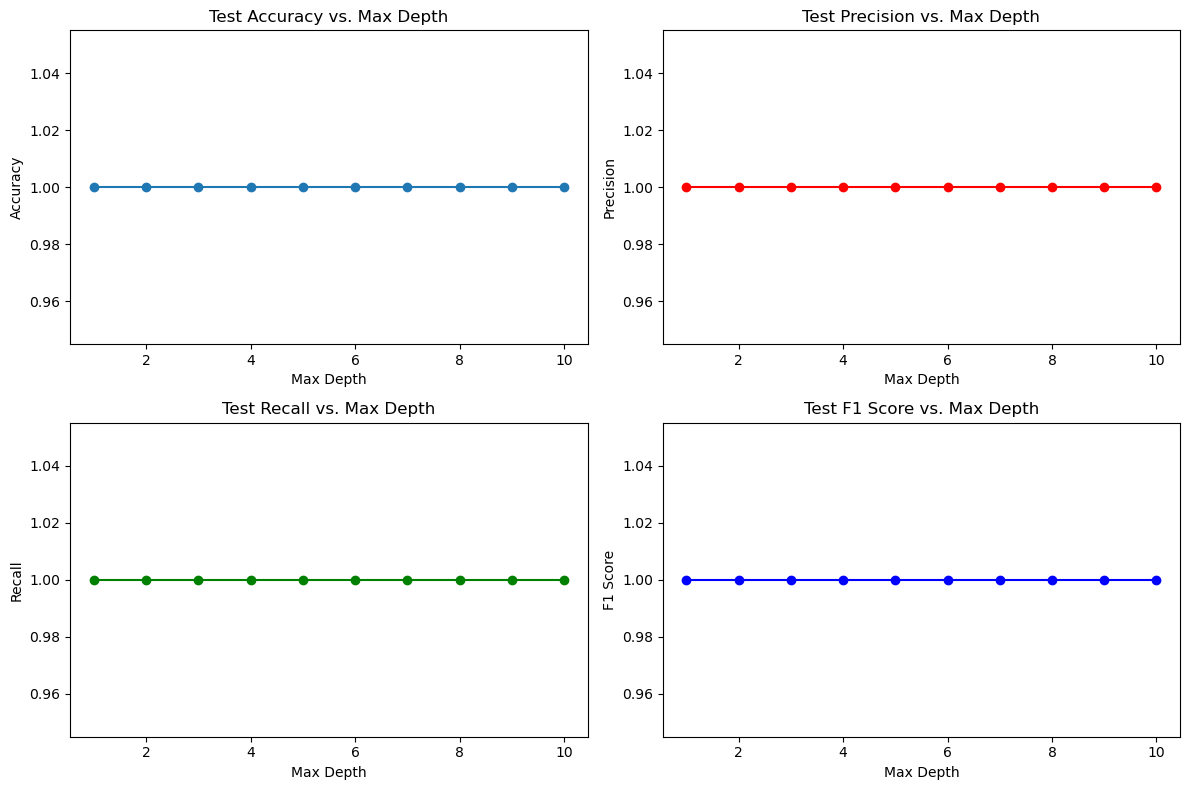

In [274]:
plt.figure(figsize=(12, 8))

# Accuracy plot
plt.subplot(2, 2, 1)
plt.plot(range(1, 11), test_accuracies, marker='o')
plt.title('Test Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

# Precision plot
plt.subplot(2, 2, 2)
plt.plot(range(1, 11), test_precisions, marker='o', color='r')
plt.title('Test Precision vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Precision')

# Recall plot
plt.subplot(2, 2, 3)
plt.plot(range(1, 11), test_recalls, marker='o', color='g')
plt.title('Test Recall vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Recall')

# F1 plot
plt.subplot(2, 2, 4)
plt.plot(range(1, 11), test_f1s, marker='o', color='b')
plt.title('Test F1 Score vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()

In [275]:
# Confusion Matrix for the best depth
best_depth = np.argmax(test_f1s) + 1  # depth with highest F1 score
best_tree = build_tree(X_train, y_train, max_depth=best_depth)
y_pred_best = predict(best_tree, X_test)

conf_matrix = confusion_matrix(y_test, y_pred_best)
print('Best depth:', best_depth) #well of course it is 10 
print(conf_matrix)

Best depth: 1
[[ 276    0]
 [   0 5748]]
